#  PCA on mnist
## Shaid Beheshti University
#### Ahmad Mahmoudi-Aznaveh
###### http://facultymembers.sbu.ac.ir/a_mahmoudi/index.html

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

mnist = load_digits()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]


In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)


In [30]:
#vectorizer.get_feature_names_out()


print(X.toarray())






[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

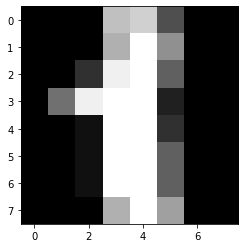

In [7]:
plt.imshow(mnist.images[1],cmap='gray');

In [8]:
X,Y=mnist.data, mnist.target

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_s = sc.fit_transform(X)

In [17]:
import numpy as np
cov_mat = np.cov(X_s.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.29406627 0.27692285 0.05037444 0.06328961 0.258273
 0.24783029 0.2423566  0.07635394 0.08246812 0.09018543 0.09840876
 0.10250434 0.11188655 0.11932898 0.12426371 0.13321081 0.14311427
 0.217582   0.15818474 0.16875236 0.20799593 0.17612894 0.2000909
 0.18983516 0.         0.         0.        ]


In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [19]:
for k in range(63):
    eigen_vals[k]=eigen_pairs[k][0]
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.29406627 0.27692285 0.258273   0.24783029 0.2423566
 0.217582   0.20799593 0.2000909  0.18983516 0.17612894 0.16875236
 0.15818474 0.14311427 0.13321081 0.12426371 0.11932898 0.11188655
 0.10250434 0.09840876 0.09018543 0.08246812 0.07635394 0.06328961
 0.05037444 0.         0.         0.        ]


In [20]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

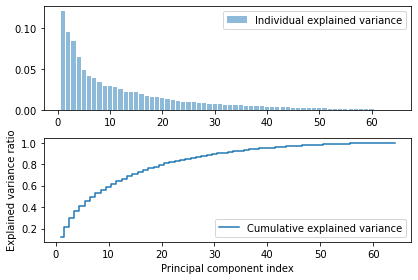

In [21]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.bar(range(1, 65), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.legend(loc='best')
plt.subplot(212)
plt.step(range(1, 65), cum_var_exp, where='mid',
        label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

In [22]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.          0.        ]
 [ 0.18223392 -0.04702701]
 [ 0.285868   -0.0595648 ]
 [ 0.22036967  0.02080385]
 [-0.02516956 -0.15590316]
 [-0.00949725 -0.27413299]
 [-0.0524765  -0.24973251]
 [-0.06269499 -0.14583207]
 [ 0.03470727  0.00102721]
 [ 0.24553368 -0.02761909]
 [ 0.22915174 -0.01450474]
 [-0.10794381  0.09225537]
 [ 0.03620209 -0.0572917 ]
 [ 0.03871159 -0.21410852]
 [-0.08378077 -0.26653585]
 [-0.09277502 -0.13699943]
 [ 0.01669934  0.00733687]
 [ 0.1367165   0.02014035]
 [-0.06305075  0.11844133]
 [-0.12287927  0.08408699]
 [ 0.14819348 -0.07684584]
 [-0.02348425 -0.15949153]
 [-0.1711997  -0.14605982]
 [-0.10420837 -0.08083712]
 [-0.00394882  0.00388437]
 [-0.1163897   0.06552741]
 [-0.18820473  0.11263765]
 [ 0.0658604  -0.05368068]
 [ 0.14353257 -0.16490377]
 [-0.12820705 -0.13773838]
 [-0.18062075 -0.056104  ]
 [-0.05270917 -0.02670685]
 [ 0.          0.        ]
 [-0.23890251  0.11768141]
 [-0.23500613  0.10539516]
 [-0.00509137 -0.05889428]
 [-0.01310881 -0.

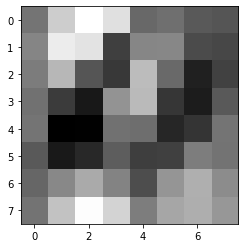

In [23]:
plt.imshow(w[:,0].reshape(8,8),cmap='gray')

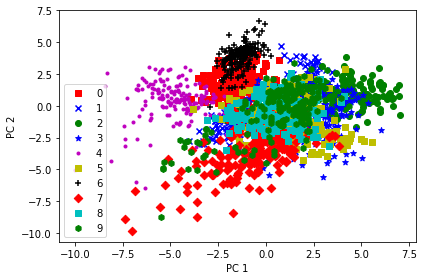

In [24]:
X_s_pca = X_s.dot(w)
colors = ['r', 'b', 'g','b', 'm', 'y', 'k', 'r', 'c', 'g']
markers = ['s', 'x', 'o','*', '.', ',', '+', 'D','s','h']

#plt.scatter(X_s_pca[Y == 1, 0], X_s_pca[Y == 1, 1])

for l, c, m in zip(range(10), colors, markers):
    plt.scatter(X_s_pca[Y == l, 0], 
             X_s_pca[Y == l, 1], 
             c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('PCAonmnist.png', dpi=300)
plt.show()

# Using SKlearn

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.3, 
                     stratify=Y,
                     random_state=0)

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test_std)

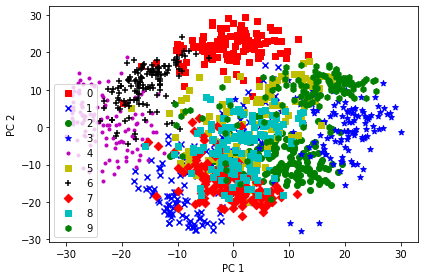

In [101]:
colors = ['r', 'b', 'g','b', 'm', 'y', 'k', 'r', 'c', 'g']
markers = ['s', 'x', 'o','*', '.', ',', '+', 'D','s','h']

#plt.scatter(X_s_pca[Y == 1, 0], X_s_pca[Y == 1, 1])

for l, c, m in zip(range(10), colors, markers):
    plt.scatter(X_train_pca[Y_train == l, 0], 
             X_train_pca[Y_train == l, 1], 
             c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('PCAonmnist.png', dpi=300)
plt.show()

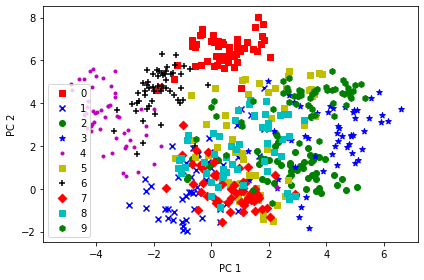

In [102]:
colors = ['r', 'b', 'g','b', 'm', 'y', 'k', 'r', 'c', 'g']
markers = ['s', 'x', 'o','*', '.', ',', '+', 'D','s','h']

#plt.scatter(X_s_pca[Y == 1, 0], X_s_pca[Y == 1, 1])

for l, c, m in zip(range(10), colors, markers):
    plt.scatter(X_test_pca[Y_test == l, 0], 
             X_test_pca[Y_test == l, 1], 
             c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('PCAonmnist.png', dpi=300)
plt.show()